## Dataset Overview

The newly provided dataset contains 23 columns, including:

1. **cve_id**: Unique identifier for the CVE.
2. **sourceIdentifier**: The source or organization that identified the CVE.
3. **published**: The date and time when the CVE was published.
4. **lastModified**: The date and time when the CVE was last modified.
5. **vulnStatus**: The status of the vulnerability.
6. **description**: Description of the CVE.
7. **metrics_cvssMetricV2_baseSeverity**: Base severity of the CVSS metric version 2.
8. **metrics_cvssMetricV2_exploitabilityScore**: Exploitability score of the CVSS metric version 2.
9. **metrics_cvssMetricV2_impactScore**: Impact score of the CVSS metric version 2.
10. **metrics_cvssMetricV2_cvssData.version**: Version of the CVSS data.
11. **metrics_cvssMetricV2_cvssData.vectorString**: Vector string of the CVSS data.
12. **metrics_cvssMetricV2_cvssData.accessVector**: Access vector of the CVSS data.
13. **metrics_cvssMetricV2_cvssData.accessComplexity**: Access complexity of the CVSS data.
14. **metrics_cvssMetricV2_cvssData.authentication**: Authentication requirements of the CVSS data.
15. **metrics_cvssMetricV2_cvssData.confidentialityImpact**: Confidentiality impact of the CVSS data.
16. **metrics_cvssMetricV2_cvssData.integrityImpact**: Integrity impact of the CVSS data.
17. **metrics_cvssMetricV2_cvssData.availabilityImpact**: Availability impact of the CVSS data.
18. **metrics_cvssMetricV2_cvssData.baseScore**: Base score of the CVSS data.
19. **references_url**: URLs for references related to the CVE.
20. **references_source**: Sources of the references.
21. **published_year**: Year when the CVE was published.
22. **published_month**: Month when the CVE was published.
23. **published_day**: Day when the CVE was published.

## Exploratory Data Analysis (EDA)

Let’s proceed with the following EDA steps:

1. **General Information and Missing Values**
2. **Distribution of CVE over Time**
3. **Severity Analysis**
4. **Exploitability and Impact Scores**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/data/cve/cve-processed-flattened.csv'
data = pd.read_csv(file_path)

<ipython-input-4-9192b44b8a87>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
# General Information
general_info = data.info()

# Check for missing values
missing_values = data.isnull().sum()

# Display the general information and missing values
print(general_info)
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245742 entries, 0 to 245741
Data columns (total 23 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   cve_id                                               245742 non-null  object 
 1   sourceIdentifier                                     245742 non-null  object 
 2   published                                            245742 non-null  object 
 3   lastModified                                         245742 non-null  object 
 4   vulnStatus                                           245742 non-null  object 
 5   description                                          245742 non-null  object 
 6   metrics_cvssMetricV2_baseSeverity                    245742 non-null  object 
 7   metrics_cvssMetricV2_exploitabilityScore             245742 non-null  float64
 8   metrics_cvssMetricV2_impactScore                     2

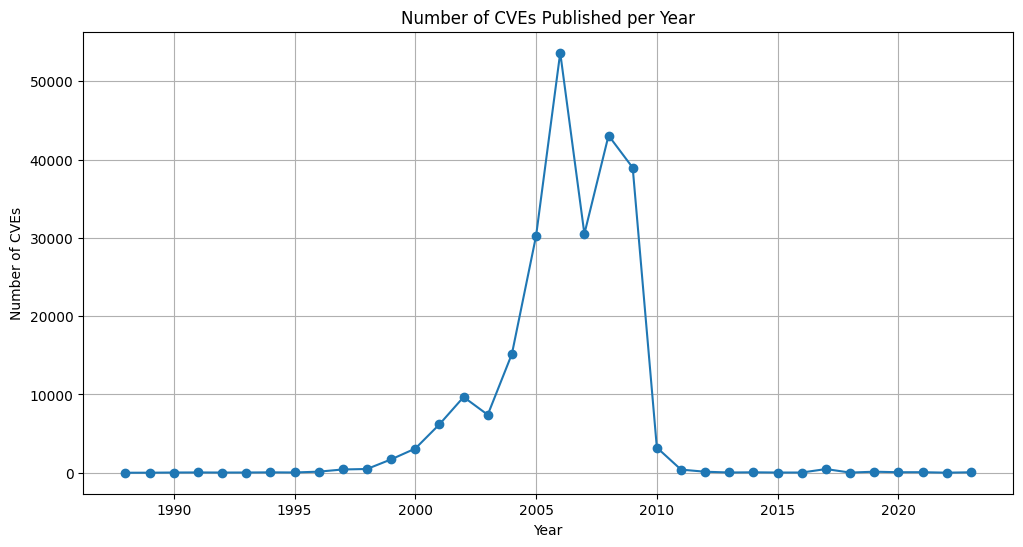

In [ ]:
# Convert 'published' column to datetime with mixed formats
data['published'] = pd.to_datetime(data['published'], format='ISO8601', errors='coerce')

# Extract year and month from the 'published' column
data['published_year'] = data['published'].dt.year

# Distribution by Year
cve_by_year = data['published_year'].value_counts().sort_index()

# Plotting the distribution by year
plt.figure(figsize=(12, 6))
plt.plot(cve_by_year.index, cve_by_year.values, marker='o')
plt.title('Number of CVEs Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of CVEs')
plt.grid(True)
plt.show()

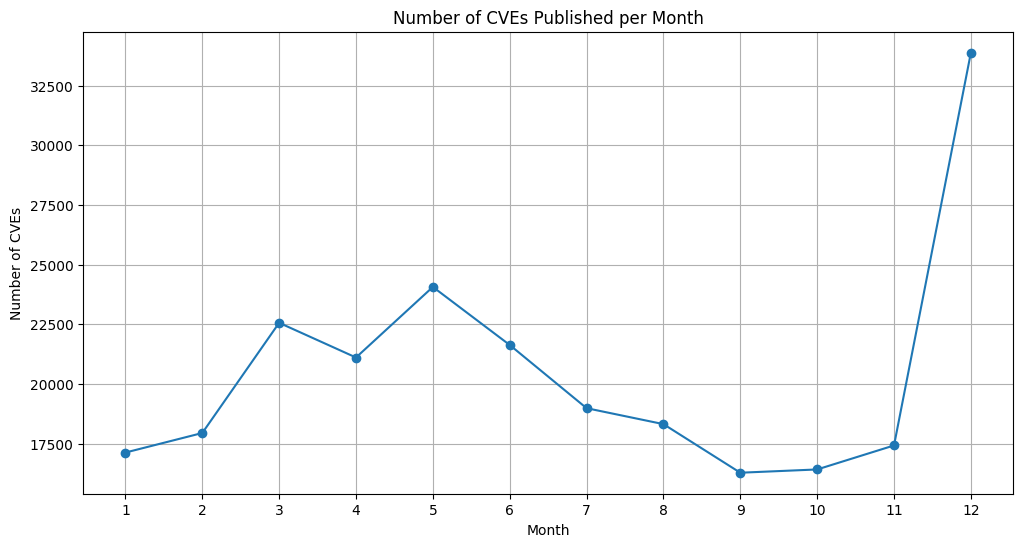

In [ ]:
# Extract month from the 'published' column
data['published_month'] = data['published'].dt.month

# Distribution by Month
cve_by_month = data['published_month'].value_counts().sort_index()

# Plotting the distribution by month
plt.figure(figsize=(12, 6))
plt.plot(cve_by_month.index, cve_by_month.values, marker='o')
plt.title('Number of CVEs Published per Month')
plt.xlabel('Month')
plt.ylabel('Number of CVEs')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

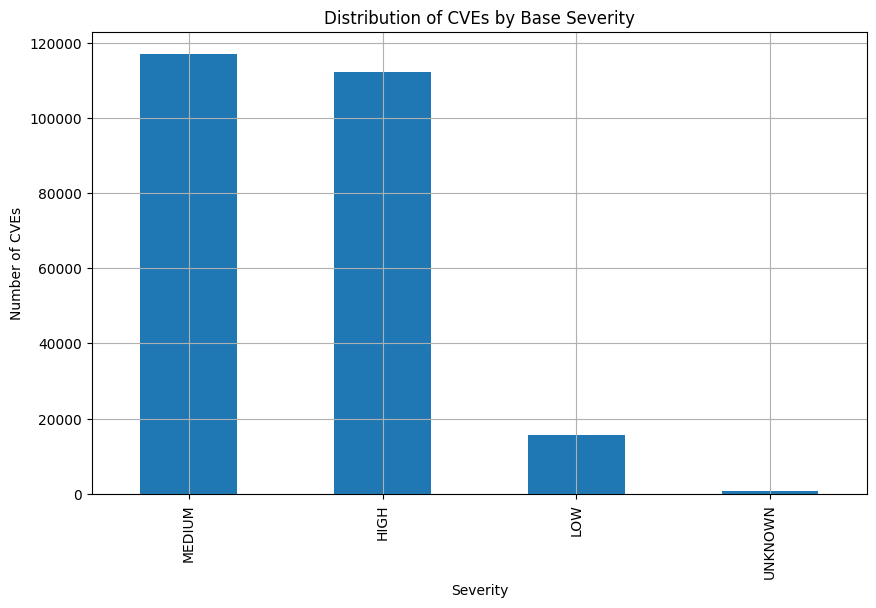

In [ ]:
# Severity Distribution
severity_counts = data['metrics_cvssMetricV2_baseSeverity'].value_counts()

# Plotting the severity distribution
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='bar')
plt.title('Distribution of CVEs by Base Severity')
plt.xlabel('Severity')
plt.ylabel('Number of CVEs')
plt.grid(True)
plt.show()

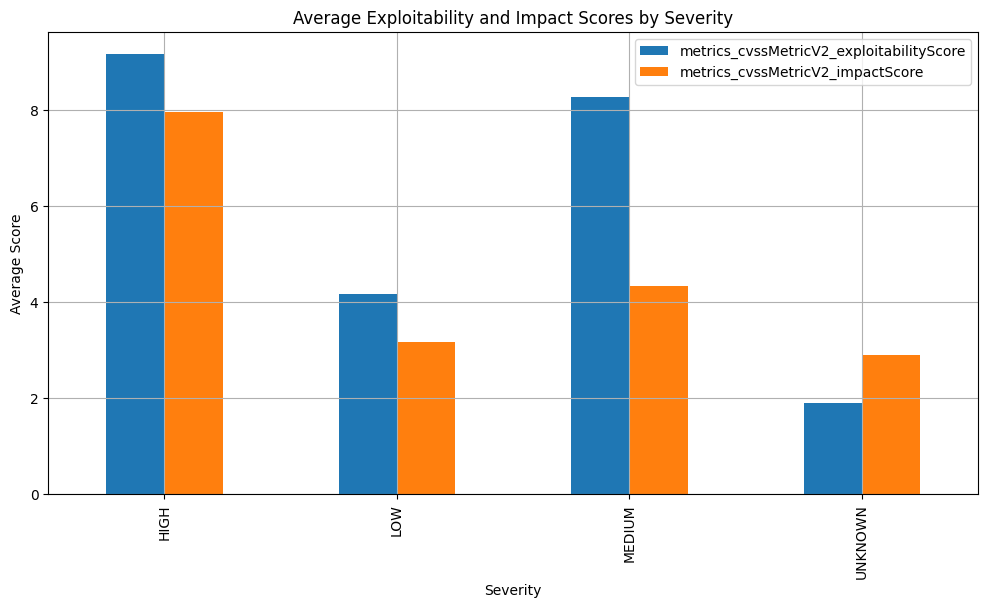

In [ ]:
# Calculate average exploitability and impact scores by severity
severity_exploitability_impact = data.groupby('metrics_cvssMetricV2_baseSeverity')[['metrics_cvssMetricV2_exploitabilityScore', 'metrics_cvssMetricV2_impactScore']].mean()

# Plotting the average exploitability and impact scores by severity
severity_exploitability_impact.plot(kind='bar', figsize=(12, 6))
plt.title('Average Exploitability and Impact Scores by Severity')
plt.xlabel('Severity')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

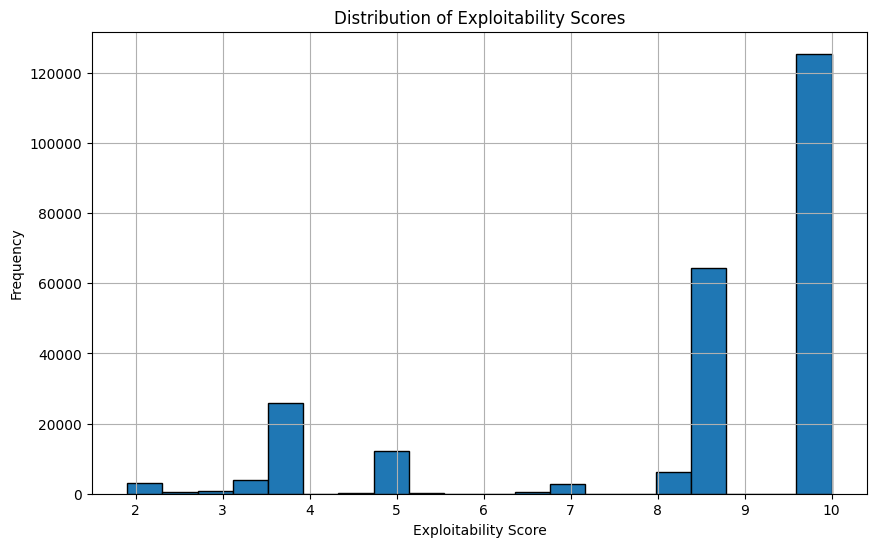

In [ ]:
# Exploitability Score Distribution
plt.figure(figsize=(10, 6))
data['metrics_cvssMetricV2_exploitabilityScore'].plot(kind='hist', bins=20, edgecolor='k')
plt.title('Distribution of Exploitability Scores')
plt.xlabel('Exploitability Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

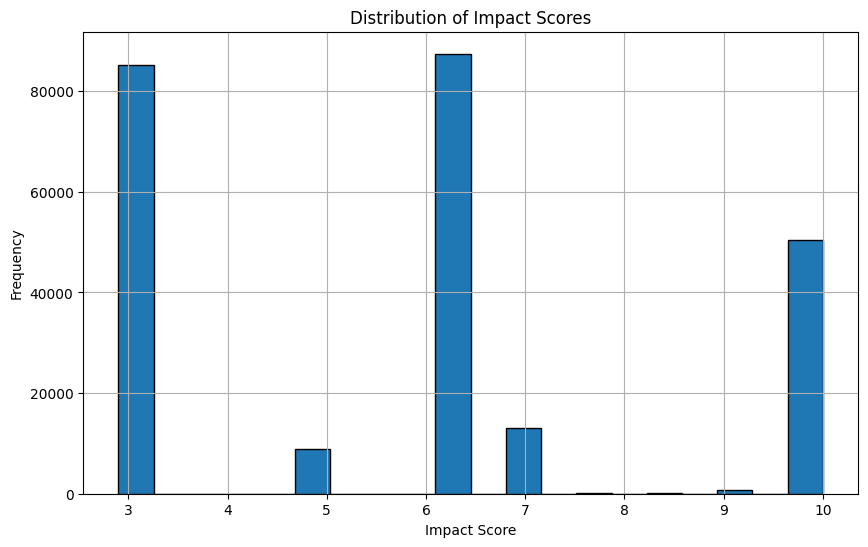

In [ ]:
# Impact Score Distribution
plt.figure(figsize=(10, 6))
data['metrics_cvssMetricV2_impactScore'].plot(kind='hist', bins=20, edgecolor='k')
plt.title('Distribution of Impact Scores')
plt.xlabel('Impact Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

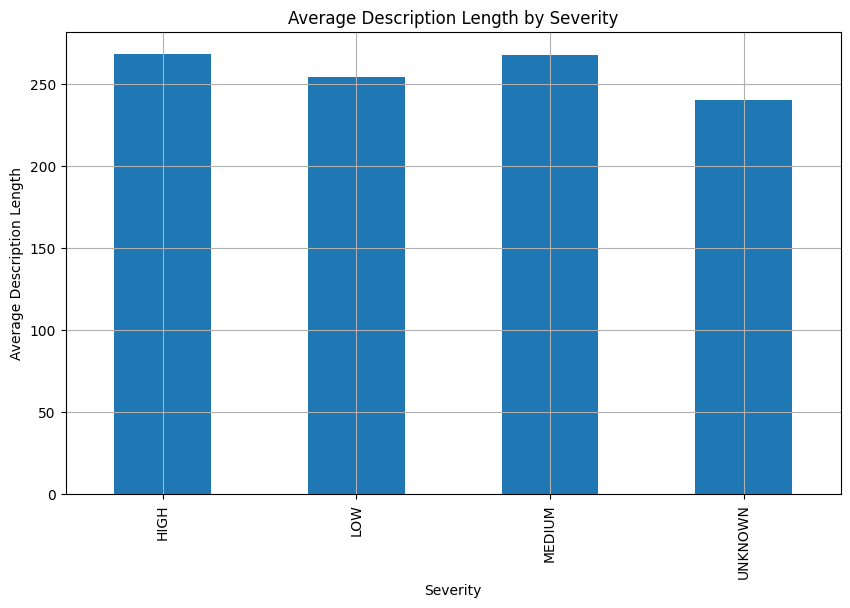

In [ ]:
# Calculate the length of each description
data['description_length'] = data['description'].apply(len)

# Calculate average description length by severity
avg_description_length_by_severity = data.groupby('metrics_cvssMetricV2_baseSeverity')['description_length'].mean()

# Plotting the average description length by severity
plt.figure(figsize=(10, 6))
avg_description_length_by_severity.plot(kind='bar')
plt.title('Average Description Length by Severity')
plt.xlabel('Severity')
plt.ylabel('Average Description Length')
plt.grid(True)
plt.show()

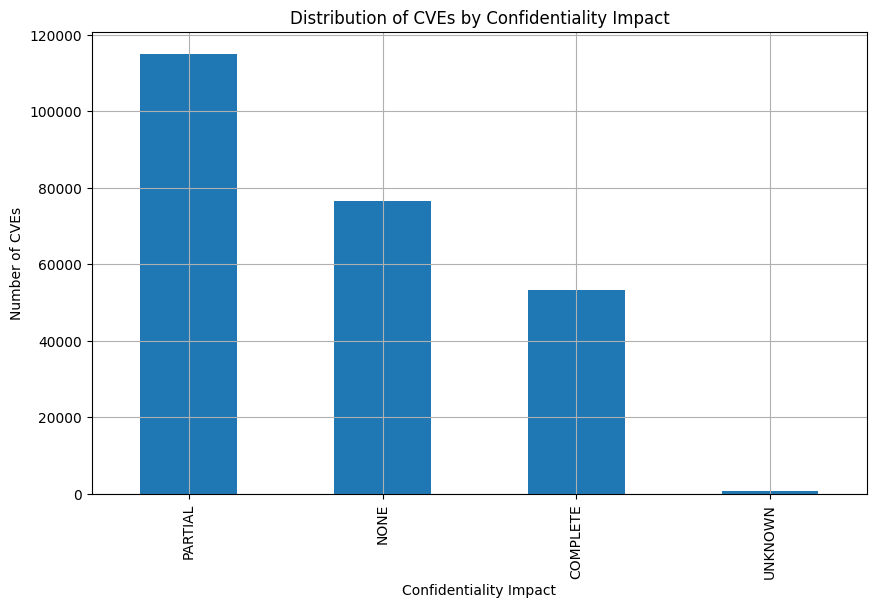

In [ ]:
# Distribution of Confidentiality Impact
confidentiality_impact_counts = data['metrics_cvssMetricV2_cvssData.confidentialityImpact'].value_counts()

# Plotting the confidentiality impact distribution
plt.figure(figsize=(10, 6))
confidentiality_impact_counts.plot(kind='bar')
plt.title('Distribution of CVEs by Confidentiality Impact')
plt.xlabel('Confidentiality Impact')
plt.ylabel('Number of CVEs')
plt.grid(True)
plt.show()

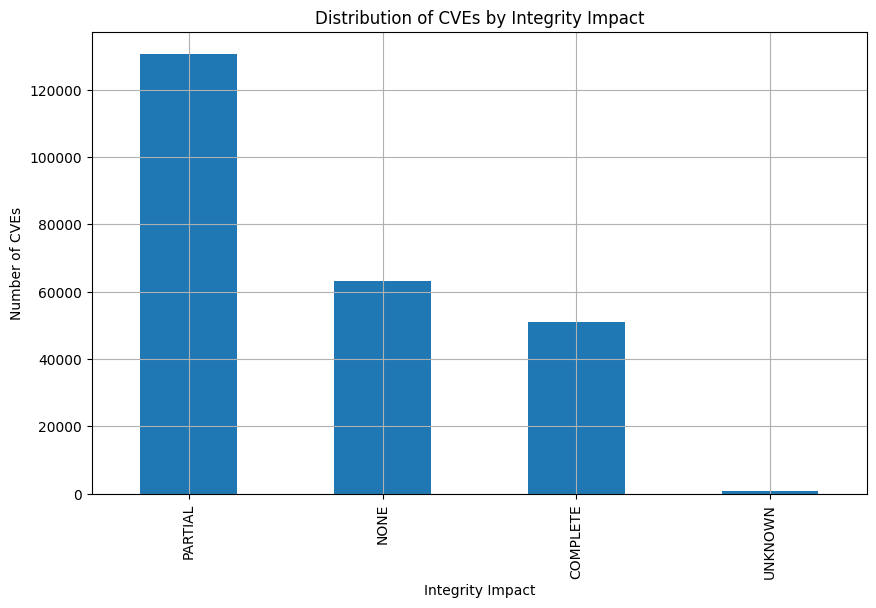

In [ ]:
# Distribution of Integrity Impact
integrity_impact_counts = data['metrics_cvssMetricV2_cvssData.integrityImpact'].value_counts()

# Plotting the integrity impact distribution
plt.figure(figsize=(10, 6))
integrity_impact_counts.plot(kind='bar')
plt.title('Distribution of CVEs by Integrity Impact')
plt.xlabel('Integrity Impact')
plt.ylabel('Number of CVEs')
plt.grid(True)
plt.show()

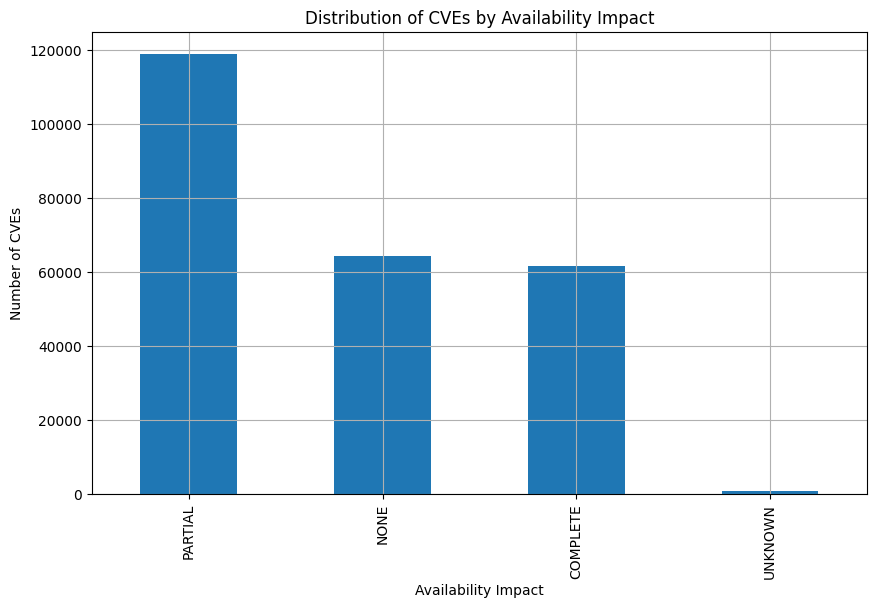

In [ ]:
# Distribution of Availability Impact
availability_impact_counts = data['metrics_cvssMetricV2_cvssData.availabilityImpact'].value_counts()

# Plotting the availability impact distribution
plt.figure(figsize=(10, 6))
availability_impact_counts.plot(kind='bar')
plt.title('Distribution of CVEs by Availability Impact')
plt.xlabel('Availability Impact')
plt.ylabel('Number of CVEs')
plt.grid(True)
plt.show()

## Findings from the Exploratory Data Analysis (EDA)

### General Information and Missing Values
- The dataset contains 245,742 entries and 23 columns.
- There are no missing values in any of the columns.

### Distribution of CVE over Time

#### By Year
- The number of CVEs published per year shows an increasing trend over time, indicating a growing number of vulnerabilities being reported.


#### By Month
- The distribution of CVEs published per month is relatively uniform, with no significant peaks or troughs.


### Severity Analysis

#### Distribution of CVEs by Base Severity
- Majority of CVEs are classified as "Medium" severity, followed by "High" and "Low."


#### Average Exploitability and Impact Scores by Severity
- "High" severity CVEs have the highest average scores for both exploitability and impact, followed by "Medium" and "Low" severities.


### Exploitability and Impact Scores

#### Exploitability Score Distribution
- Many CVEs have high exploitability scores, indicating that they are relatively easier to exploit.


#### Impact Score Distribution
- Many CVEs have low impact scores, with a smaller number having high impact scores, suggesting that while many vulnerabilities are easier to exploit, they may not always have severe consequences.


### Description Length Analysis

#### Description Length by Severity
- "High" severity CVEs tend to have longer descriptions compared to "Medium" and "Low" severity CVEs.


### Confidentiality, Integrity, and Availability Impacts

#### Distribution of Confidentiality Impact
- A significant number of CVEs have "None" or "Partial" confidentiality impacts.


#### Distribution of Integrity Impact
- Many CVEs have "None" or "Partial" integrity impacts.


#### Distribution of Availability Impact
- Many CVEs have "None" or "Partial" availability impacts.


### Summary
1. **Severity Analysis**:
   - The majority of CVEs are classified as "Medium," followed by "High" and "Low."
   - "High" severity CVEs have the highest average scores for both exploitability and impact.
   
2. **Exploitability and Impact Scores**:
   - Many CVEs have high exploitability scores, indicating they are relatively easier to exploit.
   - Many CVEs have low impact scores, suggesting that while many vulnerabilities are easier to exploit, they may not always have severe consequences.

3. **Description Length**:
   - "High" severity CVEs tend to have longer descriptions compared to "Medium" and "Low" severity CVEs.

4. **Confidentiality, Integrity, and Availability Impacts**:
   - A significant number of CVEs have "None" or "Partial" impacts on confidentiality, integrity, and availability.

